In [1]:
# Goal: Predict daily bike rental counts using time-series modeling (prophet), based on historical rental data

In [2]:
# import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [18]:
# load the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# prepare the data for Prophet
# Using only the date and count
# Prophet mandates the names 'ds' and 'y'
df_prophet = df[['dteday', 'cnt']].rename(columns={'dteday': 'ds', 'cnt': 'y'})
df_prophet.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [5]:
# Make sure 'ds' is actually in datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [6]:
# using everything except the last 30 days for training
train = df_prophet[:-30]
# keeping the last 30 days for testing
test = df_prophet[-30:]

In [7]:
# initialize the model
# turning on yearly and weekly seasonality because bike rentals change by season and day of the week
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# fit the model
model.fit(train)

12:26:56 - cmdstanpy - INFO - Chain [1] start processing
12:26:56 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# make a forecast

In [9]:
# creating a placeholder for the next 30 days
future = model.make_future_dataframe(periods=30)

# predict the values
forecast = model.predict(future)

# yhat is the predicted value
# yhat_lower and yhat_upper are the uncertainty (the range the model thinks is impossible)
predictions = forecast[['ds', 'yhat']].iloc[-30:]

In [19]:
future.head()


,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,2267.046875,-626.770946,1817.532491,2267.046875,2267.046875,-1622.675455,-1622.675455,-1622.675455,81.076078,81.076078,81.076078,-1703.751533,-1703.751533,-1703.751533,0.0,0.0,0.0,644.371420
1,2011-01-02,2273.302883,-788.726376,1643.715047,2273.302883,2273.302883,-1906.973315,-1906.973315,-1906.973315,-225.815463,-225.815463,-225.815463,-1681.157852,-1681.157852,-1681.157852,0.0,0.0,0.0,366.329567
2,2011-01-03,2279.558890,-698.785900,1649.073843,2279.558890,2279.558890,-1818.579657,-1818.579657,-1818.579657,-161.681700,-161.681700,-161.681700,-1656.897957,-1656.897957,-1656.897957,0.0,0.0,0.0,460.979233
3,2011-01-04,2285.814897,-516.456505,1739.928719,2285.814897,2285.814897,-1654.033345,-1654.033345,-1654.033345,-22.698033,-22.698033,-22.698033,-1631.335312,-1631.335312,-1631.335312,0.0,0.0,0.0,631.781552
4,2011-01-05,2292.070904,-478.715634,1847.978963,2292.070904,2292.070904,-1575.580522,-1575.580522,-1575.580522,29.254457,29.254457,29.254457,-1604.834980,-1604.834980,-1604.834980,0.0,0.0,0.0,716.490382


In [21]:
predictions.head()

,ds,yhat
701,2012-12-02,4969.197145
702,2012-12-03,5035.293404
703,2012-12-04,5173.986956
704,2012-12-05,5223.280862
705,2012-12-06,5331.144469


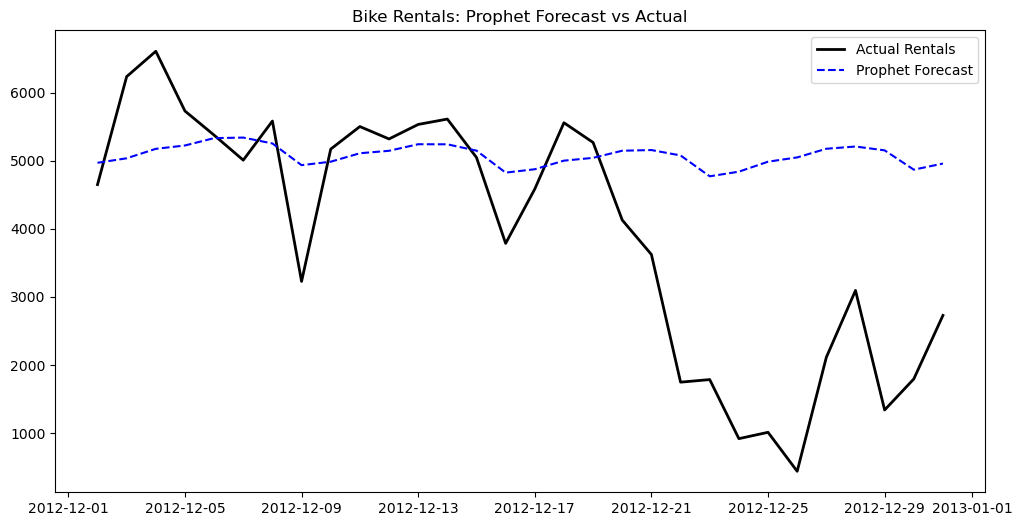

In [10]:
# visualize the results
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual Rentals', color='black', linewidth=2)
plt.plot(predictions['ds'], predictions['yhat'], label='Prophet Forecast', color='blue', linestyle='--')
plt.title('Bike Rentals: Prophet Forecast vs Actual')
plt.legend()
plt.show()

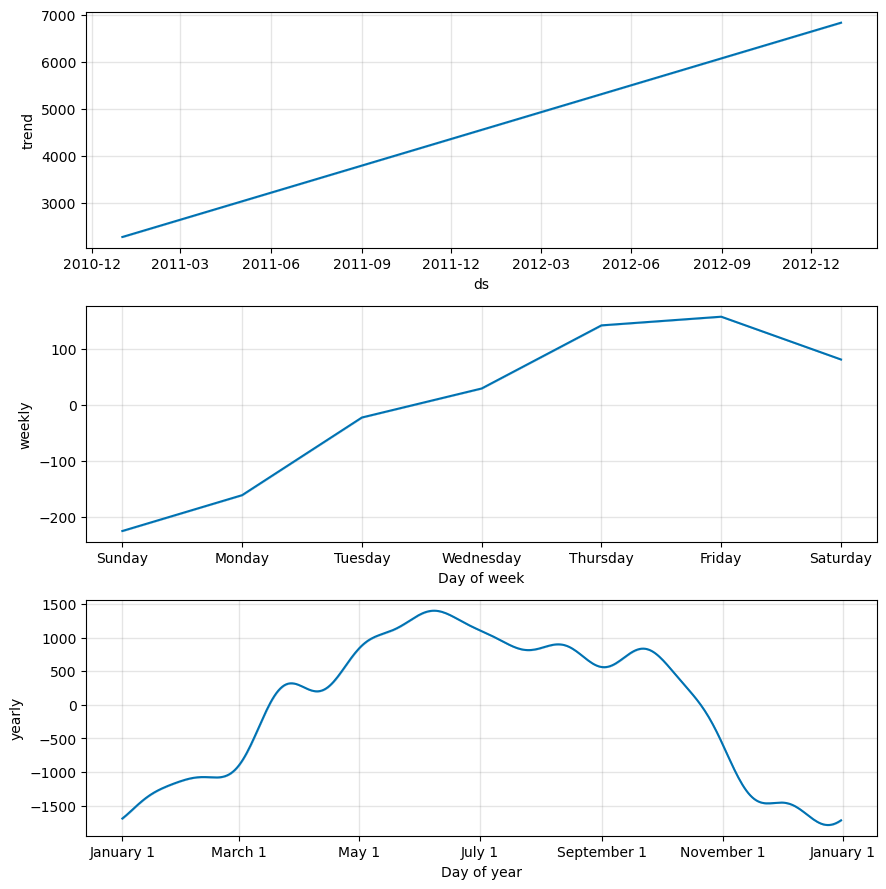

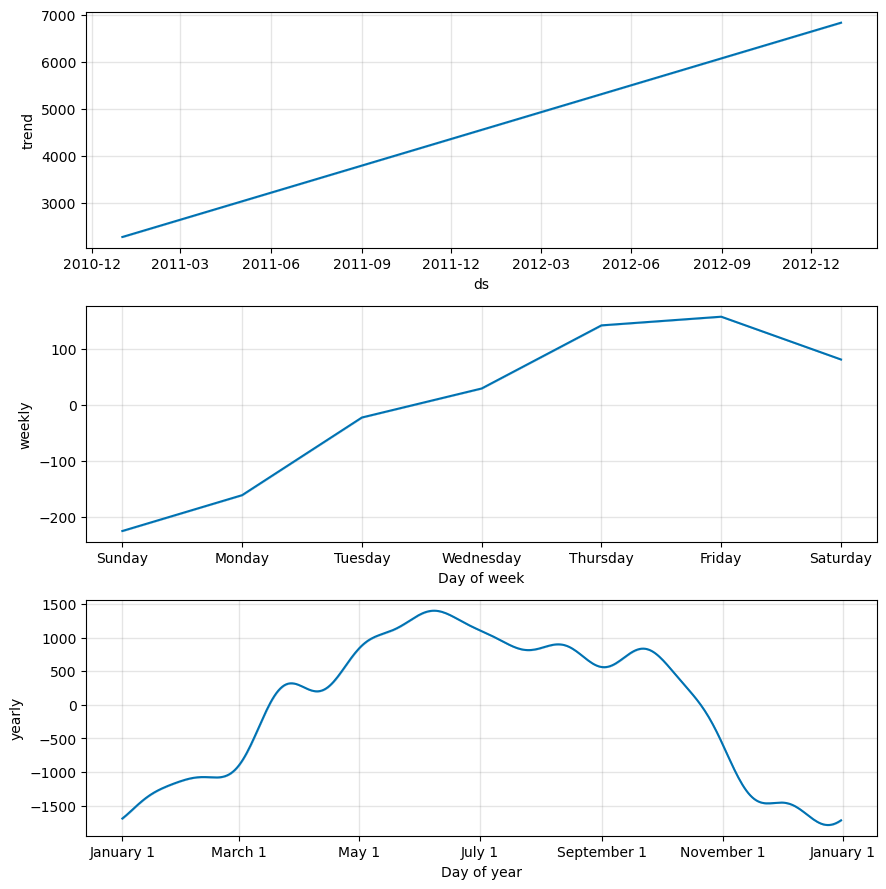

In [23]:
# visualizing the model's logic
model.plot_components(forecast)

In [29]:
# model's metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
mae = mean_absolute_error(test['y'], predictions['yhat'])
mse = mean_squared_error(test['y'], predictions['yhat'])
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1504.540701200198
Mean Squared Error: 4248046.775263699


In [31]:
# model's accuracy
from prophet.diagnostics import cross_validation, performance_metrics
cv = cross_validation(model,horizon=30)
p = performance_metrics(cv)
print(cv)
print(p.head())

  0%|          | 0/335 [00:00<?, ?it/s]

12:58:07 - cmdstanpy - INFO - Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:09 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
12:58:12 - cmdstanpy - INFO - Chain [1] start processing
12:58:12 - cmdstanpy - INFO - Chain [1]

            ds         yhat   yhat_lower   yhat_upper     y  \
0   2012-01-02  2242.429499  1376.586897  3074.238524  1951   
1   2012-01-03  2061.088995  1225.043240  2961.284380  2236   
2   2012-01-04  1805.474681   938.310823  2616.936876  2368   
3   2012-01-05  2085.879570  1243.111986  3022.796162  3272   
4   2012-01-06  2401.876511  1514.390256  3300.101675  4098   
..         ...          ...          ...          ...   ...   
330 2012-11-27  5176.542159  3939.317074  6390.415364  3959   
331 2012-11-28  5178.157132  3930.964312  6329.283971  5260   
332 2012-11-29  5301.302597  4214.866989  6511.639925  5323   
333 2012-11-30  5324.331428  4126.310622  6549.315209  5668   
334 2012-12-01  5265.462921  4131.431095  6514.219929  5191   

                           cutoff  
0   2012-01-01 23:59:59.999999970  
1   2012-01-02 23:59:59.999999970  
2   2012-01-03 23:59:59.999999970  
3   2012-01-04 23:59:59.999999970  
4   2012-01-05 23:59:59.999999970  
..                         